In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from IPython.display import HTML

# Modelowanie satysfakcji pasażerów lini lotniczej 

Zbiór zawiera dane z badania satysfakcji pasażerów linii lotnicznych. Składa się z 25 zmiennych. Dane pobrano z repozytorium Kaggle. 



**Celem projektu jest analiza satysfakcji klientów.**

W pierwszej części przeprowadzono analizę opisową wyników ankiety badającej satysfakcję klientów lini lotniczej. Ta część projektu ma za zadanie wskazanie jak klienci oceniają poszczególne składowe lotu, z czego są najbardziej zadowoleni, a co należy poprawić. 





W drugiej części przeprowadzono modelowanie predykcyjne "satysfakcji klientów". Użyte modele:

- Regresja Logistyczna
- XGboost
- lasy losowe


Produktem projektu jest model predykcyjny pomagający dobrać odpowiednie parametry lotu aby satysfakcja klientów była maksymalna.Model szasuje prawdopodbieństwo zadowolenia klientów przy wybranych parametrach.

**Dane numeryczne**

In [3]:
df = pd.read_csv("train.csv")
df = df.drop("Unnamed: 0",axis=1)


In [4]:
df.select_dtypes(include = np.number)

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


**Podstawowe statytyki dla zmiennych numerycznych**

In [13]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**Datne kategoryczne**

In [14]:
df.select_dtypes(exclude= np.number)

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


**Rozkład zmiennej celu - satysfkacji**

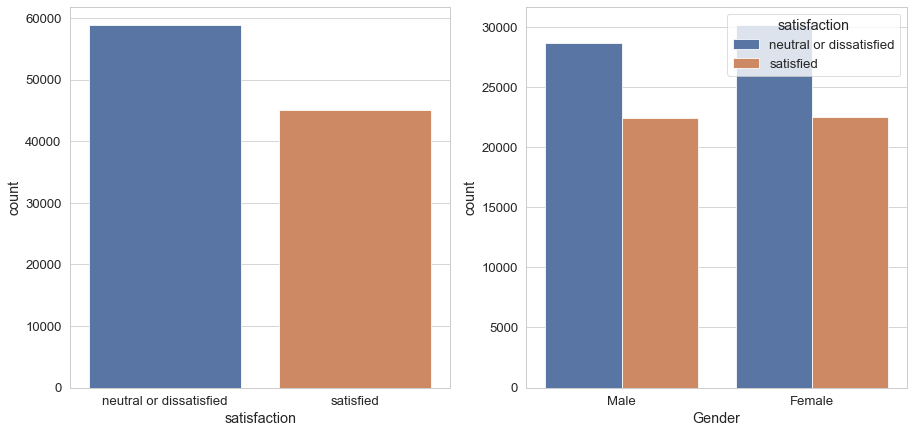

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.set_style("whitegrid")
sns.countplot( x="satisfaction", data=df,  palette="deep",ax=ax[0])
sns.countplot(x="Gender", data=df, hue='satisfaction', palette="deep",ax=ax[1])

**Rozkład satsfakcji względem wieku**

Text(0.5, 1.0, 'Customer satisfaction by Age')

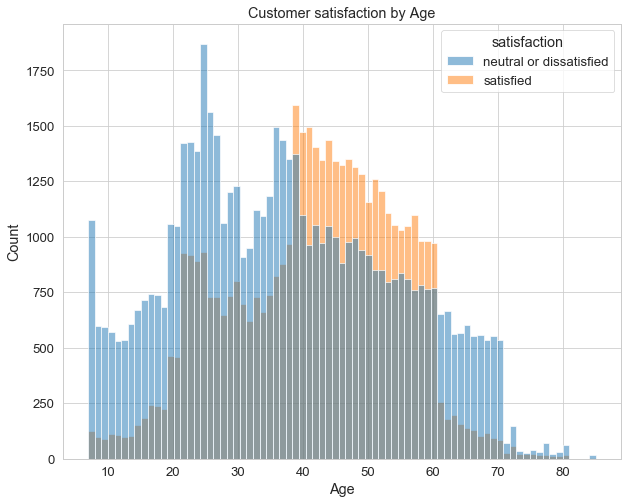

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.set_context('paper', font_scale=1.5)
sns.histplot(x='Age', data = df,
             hue ='satisfaction').set_title('Customer satisfaction by Age')

**Osoby w wieku 40-60**

In [17]:
df[(df['Age'] >= 40) & (df['Age'] <= 60)]['Age'].count()

44542

**Osoby w wieku -40**

In [18]:
df[(df['Age'] < 40)]['Age'].count()

51386

Klientów zadowolonych jest więcej niż niezadowolonych w wieku od 40 do 60 lat. Ten przedział wiekowy to 43% klientów.

Klienci poniżej 40 lat = 49%

Klienci powyżej 60 lat = 8%

**Satysfakcja względem - Class, Customer Type, Type of Travel**

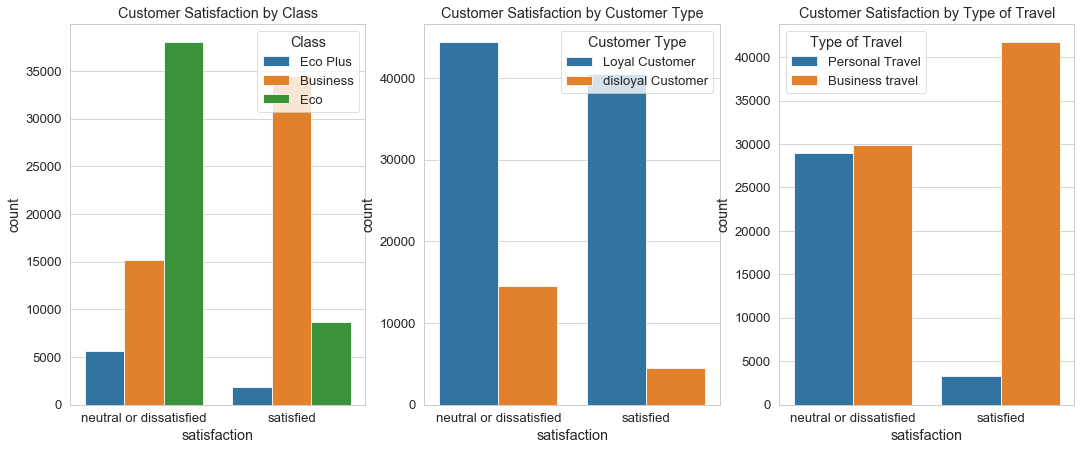

In [19]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,3, figsize=(18,7))
sns.set_context('paper', font_scale=1.5)
ax[0].set_title('Customer Satisfaction by Class')
sns.countplot(x='satisfaction', data = df, hue = 'Class', ax=ax[0])
ax[1].set_title('Customer Satisfaction by Customer Type')
sns.countplot(x='satisfaction', data = df, hue = 'Customer Type', ax=ax[1])
ax[2].set_title('Customer Satisfaction by Type of Travel')
sns.countplot(x='satisfaction', data = df, hue = 'Type of Travel', ax=ax[2])

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
neutral or dissatisfied,2.402687,3.221449,2.473177,2.975466,2.985582,2.615142,3.052685,2.967845,3.062983,3.038518,3.437108,3.085710,3.453678,3.009864
satisfied,3.869701,3.119678,3.192793,2.954291,3.529350,3.686961,3.527738,3.669512,3.306401,3.264011,3.444571,3.197914,3.452726,3.531247


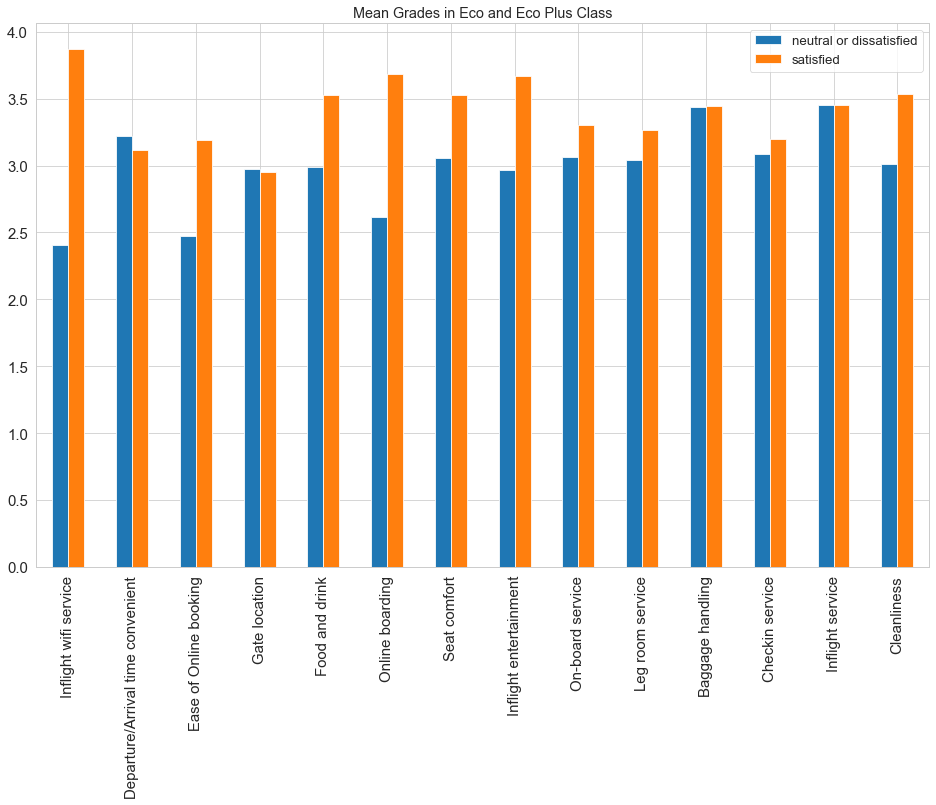

In [33]:
# Eco and Eco Plus Classes
df_s = df[(df['satisfaction'] != 'neutral or dissatisfied') & (df['Class'] != 'Business')].describe()
df_nds = df[(df['satisfaction'] == 'neutral or dissatisfied') & (df['Class'] != 'Business')].describe()

# Creates a data frame that contains only a row with mean values for the selected featuers
# satisfied
df_s_mean = df_s[1:2][['Inflight wifi service', 'Departure/Arrival time convenient', 
                       'Ease of Online booking', 'Gate location', 'Food and drink', 
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                       'Leg room service', 'Baggage handling','Checkin service', 'Inflight service', 
                       'Cleanliness']]
# Changing  the name of index from 'mean' to 'satisfied'
df_s_mean = df_s_mean.rename(index = {'mean':'satisfied'})

###

# Creates a data frame that contains only a row with mean values for the selected featuers
# neutral or dissatisfied
df_nds_mean = df_nds[1:2][['Inflight wifi service', 'Departure/Arrival time convenient', 
                       'Ease of Online booking', 'Gate location', 'Food and drink', 
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                       'Leg room service', 'Baggage handling','Checkin service', 'Inflight service', 
                       'Cleanliness']]
# Changing  the name of index from 'mean' to 'neutral or dissatisfied'
df_nds_mean = df_nds_mean.rename(index = {'mean':'neutral or dissatisfied'})

# Combines two data frames into one
final_mean = pd.concat([df_nds_mean, df_s_mean])
final_mean

###
# Graph of Mean Grades in Eco and Eco Plus Class by selected featuers
final_mean.T.plot(figsize=(16,10), fontsize=15, kind = 'bar', 
                          title='Mean Grades in Eco and Eco Plus Class')

# Combines two data frames into one
final_mean

Skoncentrujmy się na klientach neutralnych lub niezadowolonych: Niskie Średnie oceny pojawią się między innymi.

Top 3: Usługa Wi-Fi na pokładzie Łatwość rezerwacji online Wejście na pokład online

Można zauważyć, że wskaźniki te są ze sobą skorelowane. Może warto byłoby przyjrzeć się im w prawdziwym życiu. Oznacza to na przykład sprawdzenie działania Wi-Fi (usługa Wi-Fi na pokładzie) oraz systemu i aplikacji lub stworzenie bardziej przyjaznego dla użytkownika interfejsu (Wejście na pokład online, Łatwość rezerwacji online). Zadowoleni klienci wysoko ocenili te trzy cechy, więc może nie zawsze działały poprawnie.

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
neutral or dissatisfied,2.390846,2.863418,2.758841,2.978005,2.878828,2.774053,2.989134,2.682121,2.893052,2.853540,3.200132,2.919921,3.202173,2.723938
satisfied,2.944635,2.924623,2.982280,2.985093,3.518852,4.131613,4.100725,4.055278,4.025812,3.992836,4.125986,3.783092,4.127494,3.809513


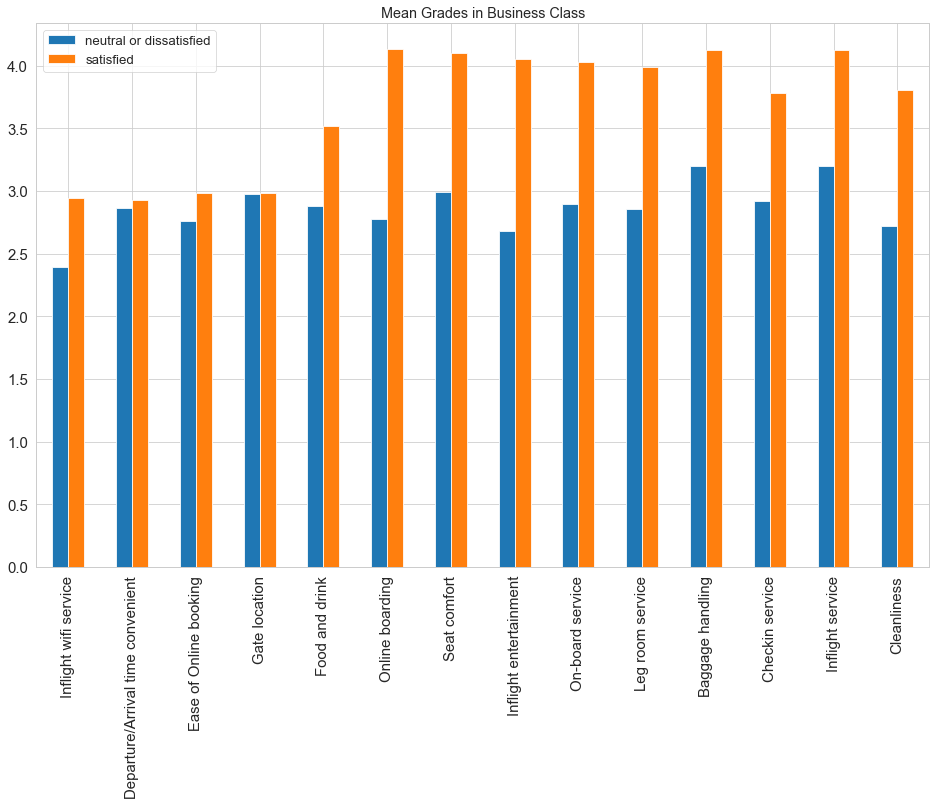

In [32]:
# Creates a data frames that contains mean values. For satisfied and neutral or dissatisfied customers
# Business Classes
df_sb = df[(df['satisfaction'] != 'neutral or dissatisfied') & (df['Class'] == 'Business')].describe()
df_ndsb = df[(df['satisfaction'] == 'neutral or dissatisfied') & (df['Class'] == 'Business')].describe()

# Creates a data frame that contains only a row with mean values for the selected featuers
# satisfied
df_sb = df_sb[1:2][['Inflight wifi service', 'Departure/Arrival time convenient', 
                       'Ease of Online booking', 'Gate location', 'Food and drink', 
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                       'Leg room service', 'Baggage handling','Checkin service', 'Inflight service', 
                       'Cleanliness']]
# Changing  the name of index from 'mean' to 'satisfied'
df_sb = df_sb.rename(index = {'mean':'satisfied'})

###

# Creates a data frame that contains only a row with mean values for the selected featuers
# neutral or dissatisfied
df_ndsb = df_ndsb[1:2][['Inflight wifi service', 'Departure/Arrival time convenient', 
                       'Ease of Online booking', 'Gate location', 'Food and drink', 
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                       'Leg room service', 'Baggage handling','Checkin service', 'Inflight service', 
                       'Cleanliness']]
# Changing  the name of index from 'mean' to 'neutral or dissatisfied'
df_ndsb = df_ndsb.rename(index = {'mean':'neutral or dissatisfied'})

# Combines two data frames into one
final_meanb = pd.concat([df_ndsb, df_sb])
final_meanb


# Graph of Mean Grades in Business Class by selected featuers
final_meanb.T.plot(figsize=(16,10), fontsize=15, kind = 'bar', 
                          title='Mean Grades in Business Class')

# Combines two data frames into one
final_meanb



Oprócz tego, że nasze 3 najlepsze cechy w klasie ekologicznej są na niskim poziomie w klasie biznes i dość równomiernie ocenione, biorąc pod uwagę różnicę w satysfakcji.

Ponadto neutralni lub niezadowoleni klienci klasy biznes liczyli na lepsze:

Rozrywka na pokładzie Czystość

**Długość lotu**

Text(0.5, 1.0, 'Histogram of Flight Distance')

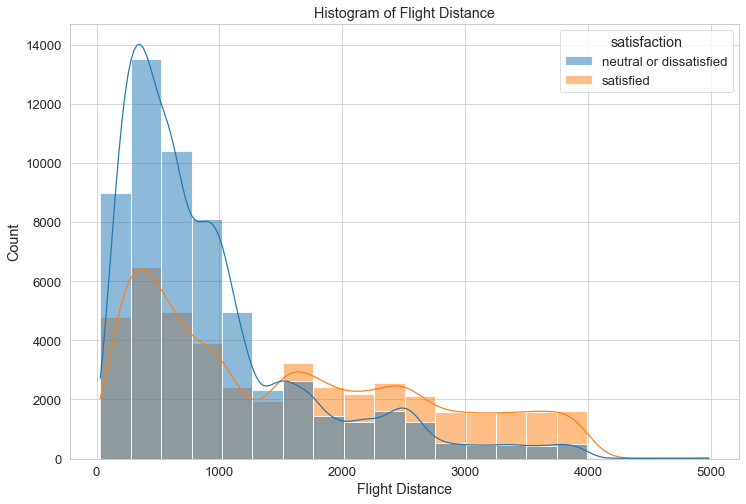

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Flight Distance', data = df, bins = 20, hue ='satisfaction', 
             kde = True).set_title('Histogram of Flight Distance')

Text(0.5, 1.0, 'Histogram of Flight Distance by Eco and Eco Plus Class')

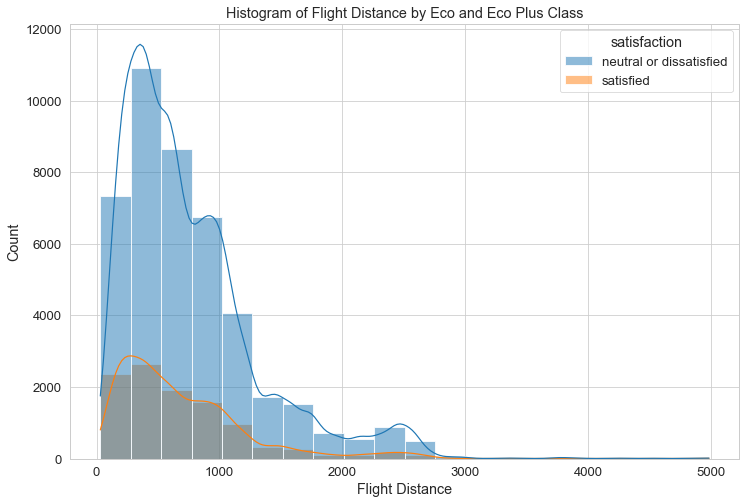

In [40]:
# How is this feautre distributed in the Eco and Eco Plus class?

sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Flight Distance', data = df[df['Class'] != 'Business'], bins = 20, hue ='satisfaction', 
             kde = True).set_title('Histogram of Flight Distance by Eco and Eco Plus Class')

Text(0.5, 1.0, 'Histogram of Flight Distance by Business Class')

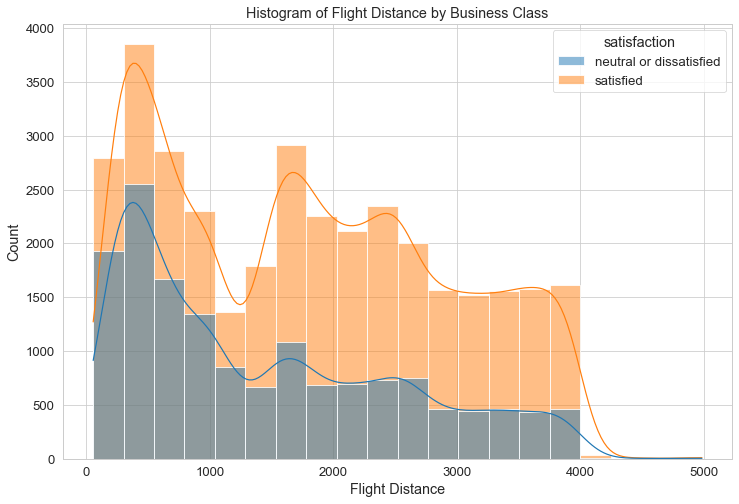

In [41]:
# How is this feautre distributed in the Business class?

sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Flight Distance', data = df[df['Class'] == 'Business'], bins = 20, hue ='satisfaction', 
             kde = True).set_title('Histogram of Flight Distance by Business Class')

Na pierwszym wykresie, na którym sprawdzamy wszystkich klientów, widać, że duża część lotów mieści się w przedziale 0-1250 (odległość). Dwukrotnie lub więcej klientów, w zależności od odległości, jest neutralnych lub niezadowolonych. Większość z nich mieści się w przedziale 250 - 750.


W klasach Eco i Eco Plus powyższy wniosek się powtarza, a niezadowolenie z zadowolenia pojawia się u jeszcze większej liczby klientów.


W klasie Business przeważa liczba zadowolonych klientów. Na dystansie 0-1250 widoczna jest przewaga zadowolonych klientów, natomiast powyżej 1250 przewaga jest znacząca.


Jeśli chcielibyśmy zwiększyć satysfakcję klientów. Niektóre dodatki można rozważyć dla klientów w klasie Eco i Eco Plus, którzy latają 250 - 750. Jeśli to możliwe.

**Opóźnienia lotów**

Text(0.5, 0.98, 'Departure Delay in Minutes vs Arrival Delay in Minutes')

<Figure size 864x576 with 0 Axes>

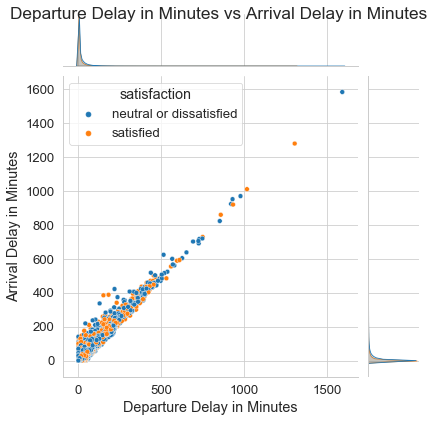

In [42]:
# Departure Delay in Minutes vs Arrival Delay in Minutes
sns.set_style('whitegrid')
plt.figure(figsize=(12,12))
sns.set_context('paper', font_scale=1.5)

g = sns.jointplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', 
              data = df, hue = 'satisfaction')

g.fig.suptitle('Departure Delay in Minutes vs Arrival Delay in Minutes')

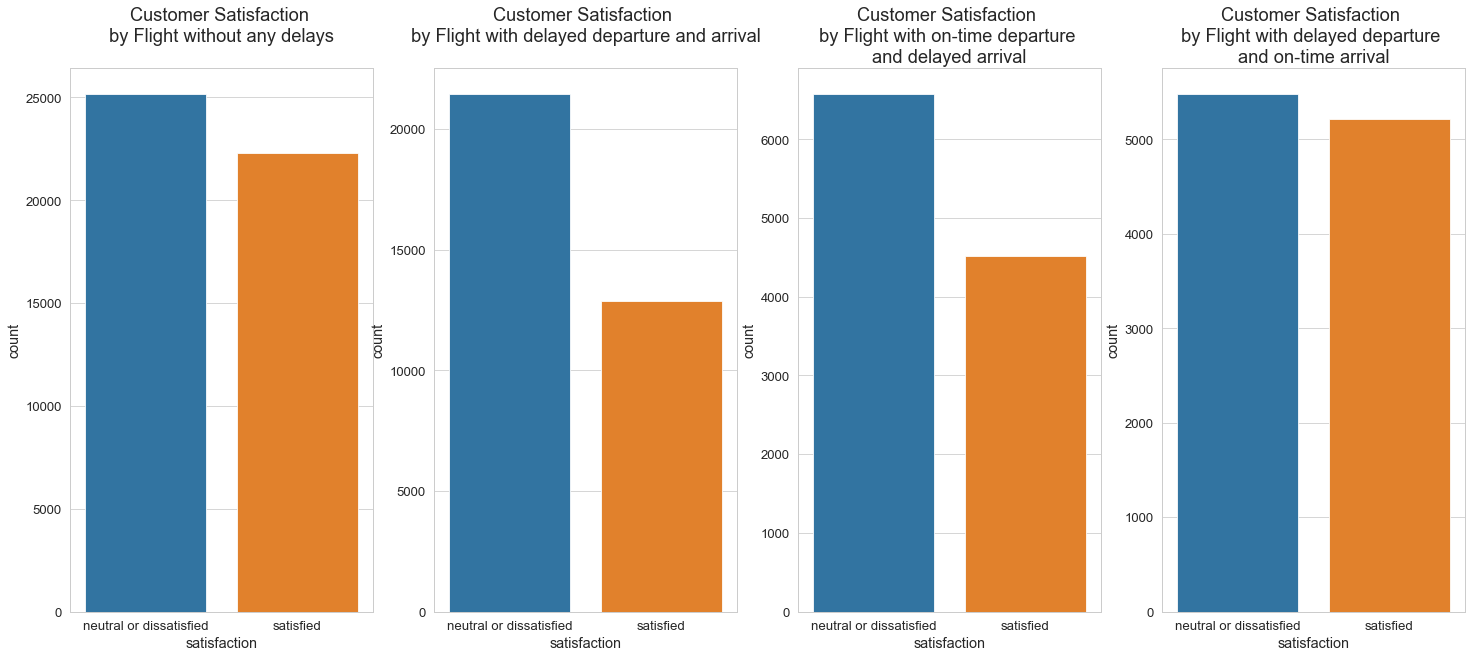

In [23]:
# Graphs of Customer Satisfaction by Departure and Arrival Delay
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,4, figsize=(25,10))
sns.set_context('paper', font_scale=1.9)

ax[0].set_title('Customer Satisfaction \nby Flight without any delays\n')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data = df[(df['Departure Delay in Minutes'] == 0) & (df['Arrival Delay in Minutes'] == 0)], 
              ax=ax[0])

ax[1].set_title('Customer Satisfaction \nby Flight with delayed departure and arrival\n')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data = df[(df['Departure Delay in Minutes'] > 0) & (df['Arrival Delay in Minutes'] > 0)], 
              ax=ax[1])

ax[2].set_title('Customer Satisfaction \nby Flight with on-time departure \nand delayed arrival')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data = df[(df['Departure Delay in Minutes'] == 0) & (df['Arrival Delay in Minutes'] > 0)], 
              ax=ax[2])

ax[3].set_title('Customer Satisfaction \nby Flight with delayed departure \nand on-time arrival')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data = df[(df['Departure Delay in Minutes'] > 0) & (df['Arrival Delay in Minutes'] == 0)], 
              ax=ax[3])

Generalnie wszędzie panuje wysoki poziom neutralności lub niezadowolenia z klientów, ale ma to sens, ponieważ było ich więcej. Widać jednak, że punktualne przybycie, mimo opóźnionego wyjazdu, jest ważne, bo widać prawie równą liczbę zadowolonych i neutralnych lub niezadowolonych klientów.

**Korelacje miedzy zmiennymi**

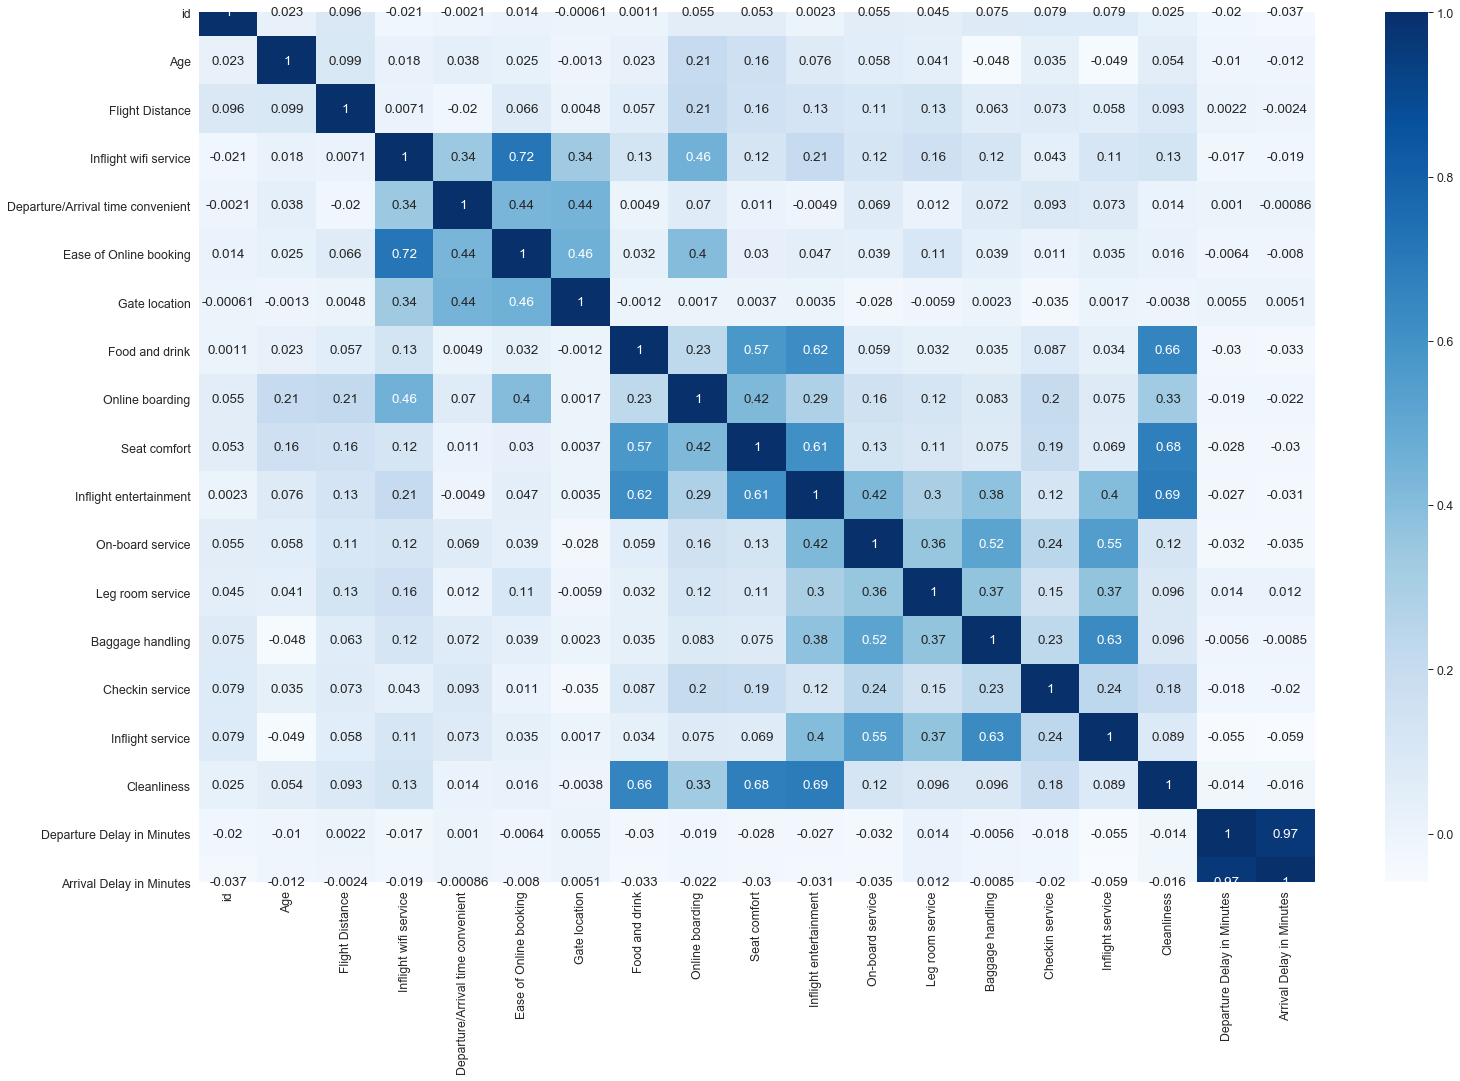

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize=(25,16))
sns.set_context('paper', font_scale=1.4)
crash_mx = df.corr()
sns.heatmap(crash_mx, annot=True, cmap='Blues')